In [28]:
from typing import Callable
from dataclasses import dataclass
from evaluation.eval_analysis import (
    find_shared_proofs,
    EvalDict,
    PlotInfo,
    time_key,
    expanded_key,
    get_combined_num_proofs_by_metric,
    SuccessMetric,
)
import matplotlib.pyplot as plt

In [29]:
EVAL_DIRS = [
    ("Finetuned full dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split"),
    ("Finetuned 15% dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split-rnd-samp-15-pct"),
    ("Finetuned 8% dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split-rnd-samp-8-pct"),
]

In [30]:
eval_dirs = [b for _, b in EVAL_DIRS]
shared_proof_names = find_shared_proofs(eval_dirs)

In [31]:
eval_dicts = [EvalDict.from_shared_proofs(e, p, shared_proof_names) for e, p in EVAL_DIRS]

In [32]:

def get_matching_x_axes(
    eval_dicts: list[EvalDict], metric: SuccessMetric
) -> tuple[list[PlotInfo], PlotInfo]:
    plot_infos = [ed.get_num_proofs_by_metric(metric) for ed in eval_dicts]
    max_metric = max([p.xs[-1] for p in plot_infos])

    for plot_info in plot_infos:
        if plot_info.xs[-1] != max_metric:
            plot_info.xs.append(max_metric)
            plot_info.ys.append(plot_info.ys[-1])
    
    combined_plot_info = get_combined_num_proofs_by_metric(eval_dicts, metric)
    if combined_plot_info.xs[-1] != max_metric:
        combined_plot_info.xs.append(max_metric)
        combined_plot_info.ys.append(combined_plot_info.ys[-1])

    return plot_infos, combined_plot_info 


  

Text(0.5, 1.0, '# Proofs found out of 3 Theorems.')

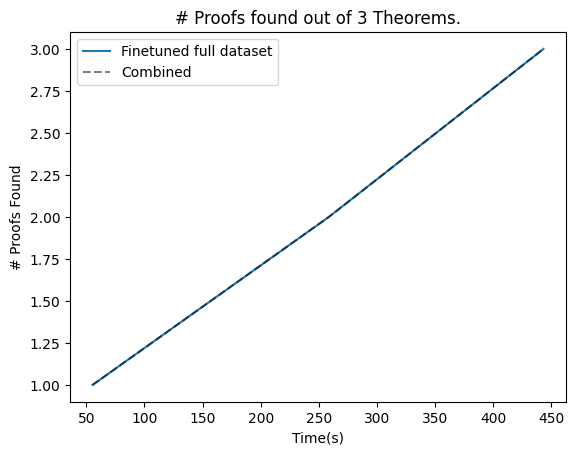

In [33]:
fig, ax = plt.subplots()
assert type(ax) == plt.Axes

plot_infos, combined_plot_info = get_matching_x_axes(eval_dicts, time_key)

for plot_info in plot_infos: 
    ax.plot(plot_info.xs, plot_info.ys, label=plot_info.name)

ax.plot(combined_plot_info.xs, combined_plot_info.ys, "--", label=combined_plot_info.name, color="black", alpha=0.5,)

ax.legend()
ax.set_xlabel("Time(s)")
ax.set_ylabel("# Proofs Found")
ax.set_title(f"# Proofs found out of {len(shared_proof_names)} Theorems.")


In [34]:
plot_infos

[PlotInfo(xs=[55.381630592, 258.684736338, 443.304728258], ys=[1, 2, 3], name='Finetuned full dataset')]

Text(0.5, 1.0, '# Proofs Found out of 3 Theorems.')

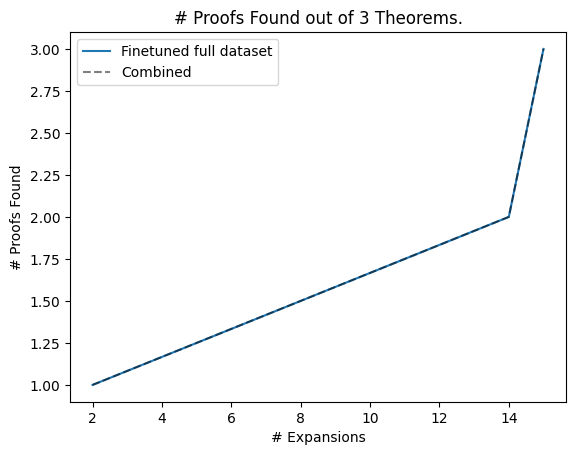

In [35]:
fig, ax = plt.subplots()
assert type(ax) == plt.Axes

plot_infos, combined_plot_info = get_matching_x_axes(eval_dicts, expanded_key)

for plot_info in plot_infos: 
    ax.plot(plot_info.xs, plot_info.ys, label=plot_info.name)

ax.plot(combined_plot_info.xs, combined_plot_info.ys, "--", label=combined_plot_info.name, color="black", alpha=0.5,)


ax.legend()
ax.set_xlabel("# Expansions")
ax.set_ylabel("# Proofs Found")
ax.set_title(f"# Proofs Found out of {len(shared_proof_names)} Theorems.")

In [36]:
get_fine_grained_comparison_stats(EVAL_DIRS, shared_proof_names)

NameError: name 'get_fine_grained_comparison_stats' is not defined

In [ ]:
get_shortest_failed_proof(EVAL_DIRS, "/home/ubuntu/coq-modeling/failed-examples")

/home/ubuntu/coq-modeling/failed-examples exists.
